# Analysis notebook: `SU2020a_signal_onspill-LH_aw`  

## Define analysis name

In [1]:
ana_label = "SU2020a_signal_onspill-LH_aw"

## Preamble

In [2]:
import sys
sys.path.append("..")
from preamble import *

## Load data

In [3]:
!ls ../../../output/results/SU2020a_signal_onspill-LH_aw

analysis.csv  hists.h5	   SU2020a_signal_onspill-LH_aw.log
cut_flow.csv  results.pkl  SU2020a_signal_onspill-LH_aw.yaml


In [4]:
loader = Load(
    in_path = f"../../../output/results/{ana_label}"
)

[Load] ✅ Initialised with out_path=../../../output/results/SU2020a_signal_onspill-LH_aw


In [5]:
results = loader.load_pkl() 
results_from_persistent = loader.load_all() # Persistent backup 

[Load] ✅ Successfully loaded results from ../../../output/results/SU2020a_signal_onspill-LH_aw/results.pkl
[Load] ✅ Loaded cut stats from ../../../output/results/SU2020a_signal_onspill-LH_aw/cut_flow.csv
[Load] ✅ Loaded histograms from ../../../output/results/SU2020a_signal_onspill-LH_aw/hists.h5
[Load] ✅ Loaded analysis info from ../../../output/results/SU2020a_signal_onspill-LH_aw/analysis.csv
[Load] ⚠️ File not found: ../../../output/results/SU2020a_signal_onspill-LH_aw/events.parquet
[Load] ⚠️ File not found: ../../../output/results/SU2020a_signal_onspill-LH_aw/info.txt


## Analyse results

### Cut flow

In [6]:
display(results["cut_flow"].round(3))

,Cut,Group,Events Passing,Absolute [%],Relative [%],Description
0,No cuts,NaN,1474788,100.000,100.000,No selection applied
1,has_trk_front,Preselect,1474432,99.976,99.976,Tracks intersect tracker entrance
2,is_reco_electron,Preselect,1473015,99.880,99.904,Electron track fits
3,is_downstream,Preselect,1473003,99.879,99.999,Downstream tracks (p_z > 0 at tracker entrance)
4,one_reco_electron,Preselect,1468842,99.597,99.718,One reco electron / event
5,is_truth_electron,Preselect,1468840,99.597,100.000,Track parents are electrons (truth PID)
6,good_trkqual,Tracker,798612,54.151,54.370,Track fit quality > 0.8
7,within_t0,Tracker,577416,39.152,72.302,t0 at tracker entrance (640 < t_0 < 1650 ns)
8,has_hits,Tracker,573088,38.859,99.250,>20 active tracker hits
9,within_t0err,Tracker,34865,2.364,6.084,Track fit t0 uncertainty (t0err < 0.9 ns)


### Efficiency & rates

In [7]:
display(results["analysis"].round(3))

,Type,k,N,Eff [%],Eff Err$-$ [%],Eff Err$+$ [%],Rate 1batch [$\text{day}^{-1}$],Rate 1batch Err$-$ [$\text{day}^{-1}$],Rate 1batch Err$+$ [$\text{day}^{-1}$],Rate 2batch [$\text{day}^{-1}$],Rate 2batch Err$-$ [$\text{day}^{-1}$],Rate 2batch Err$+$ [$\text{day}^{-1}$]
0,CE-like (wide),16184,4000000,0.405,-0.003,0.003,16184.0,-126.514,127.510,16184.0,-126.514,127.510
1,CE-like (ext),15077,4000000,0.377,-0.003,0.003,15077.0,-122.110,123.107,15077.0,-122.110,123.107
2,CE-like (sig),11926,4000000,0.298,-0.003,0.003,11926.0,-108.603,109.600,11926.0,-108.603,109.600
3,No veto (wide),0,16184,100.000,-0.006,0.000,0.0,0.000,1.139,0.0,0.000,1.139
4,No veto (ext),0,15077,100.000,-0.007,0.000,0.0,0.000,1.139,0.0,0.000,1.139
5,No veto (sig),0,11926,100.000,-0.008,0.000,0.0,0.000,1.139,0.0,0.000,1.139


### Histograms

In [8]:
# Setup draw for this cutset
on_spill = "offspill" not in ana_label
draw = Draw(cutset_name=ana_label.split('_')[0], on_spill=on_spill)
# Define image directory
img_dir = f"../../../output/images/{ana_label}"
os.makedirs(img_dir, exist_ok=True)

[Plot] ⭐️ Initialised


[Plot] ✅ 	Wrote ../../../output/images/SU2020a_signal_onspill-LH_aw/h1o_1x3_mom_windows.png


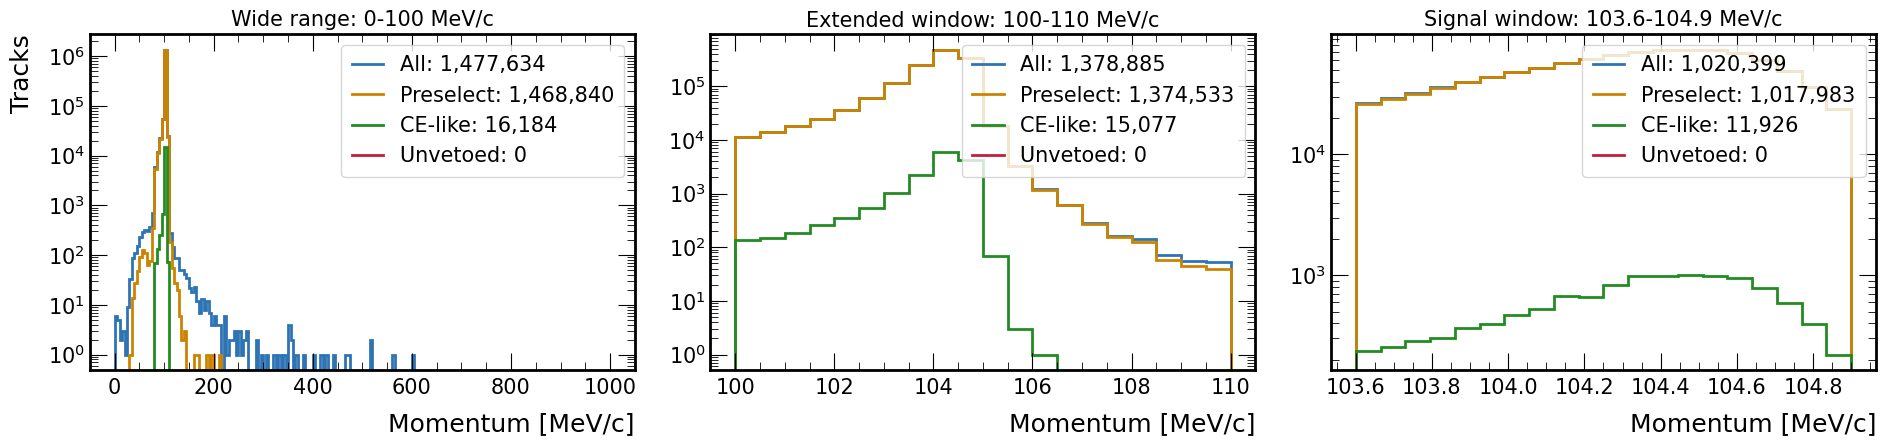

In [9]:
draw.plot_mom_windows(results["hists"], out_path=f"{img_dir}/h1o_1x3_mom_windows.png") 

[Plot] ✅ 	Wrote ../../../output/images/SU2020a_signal_onspill-LH_aw/h1o_3x3_summary.png


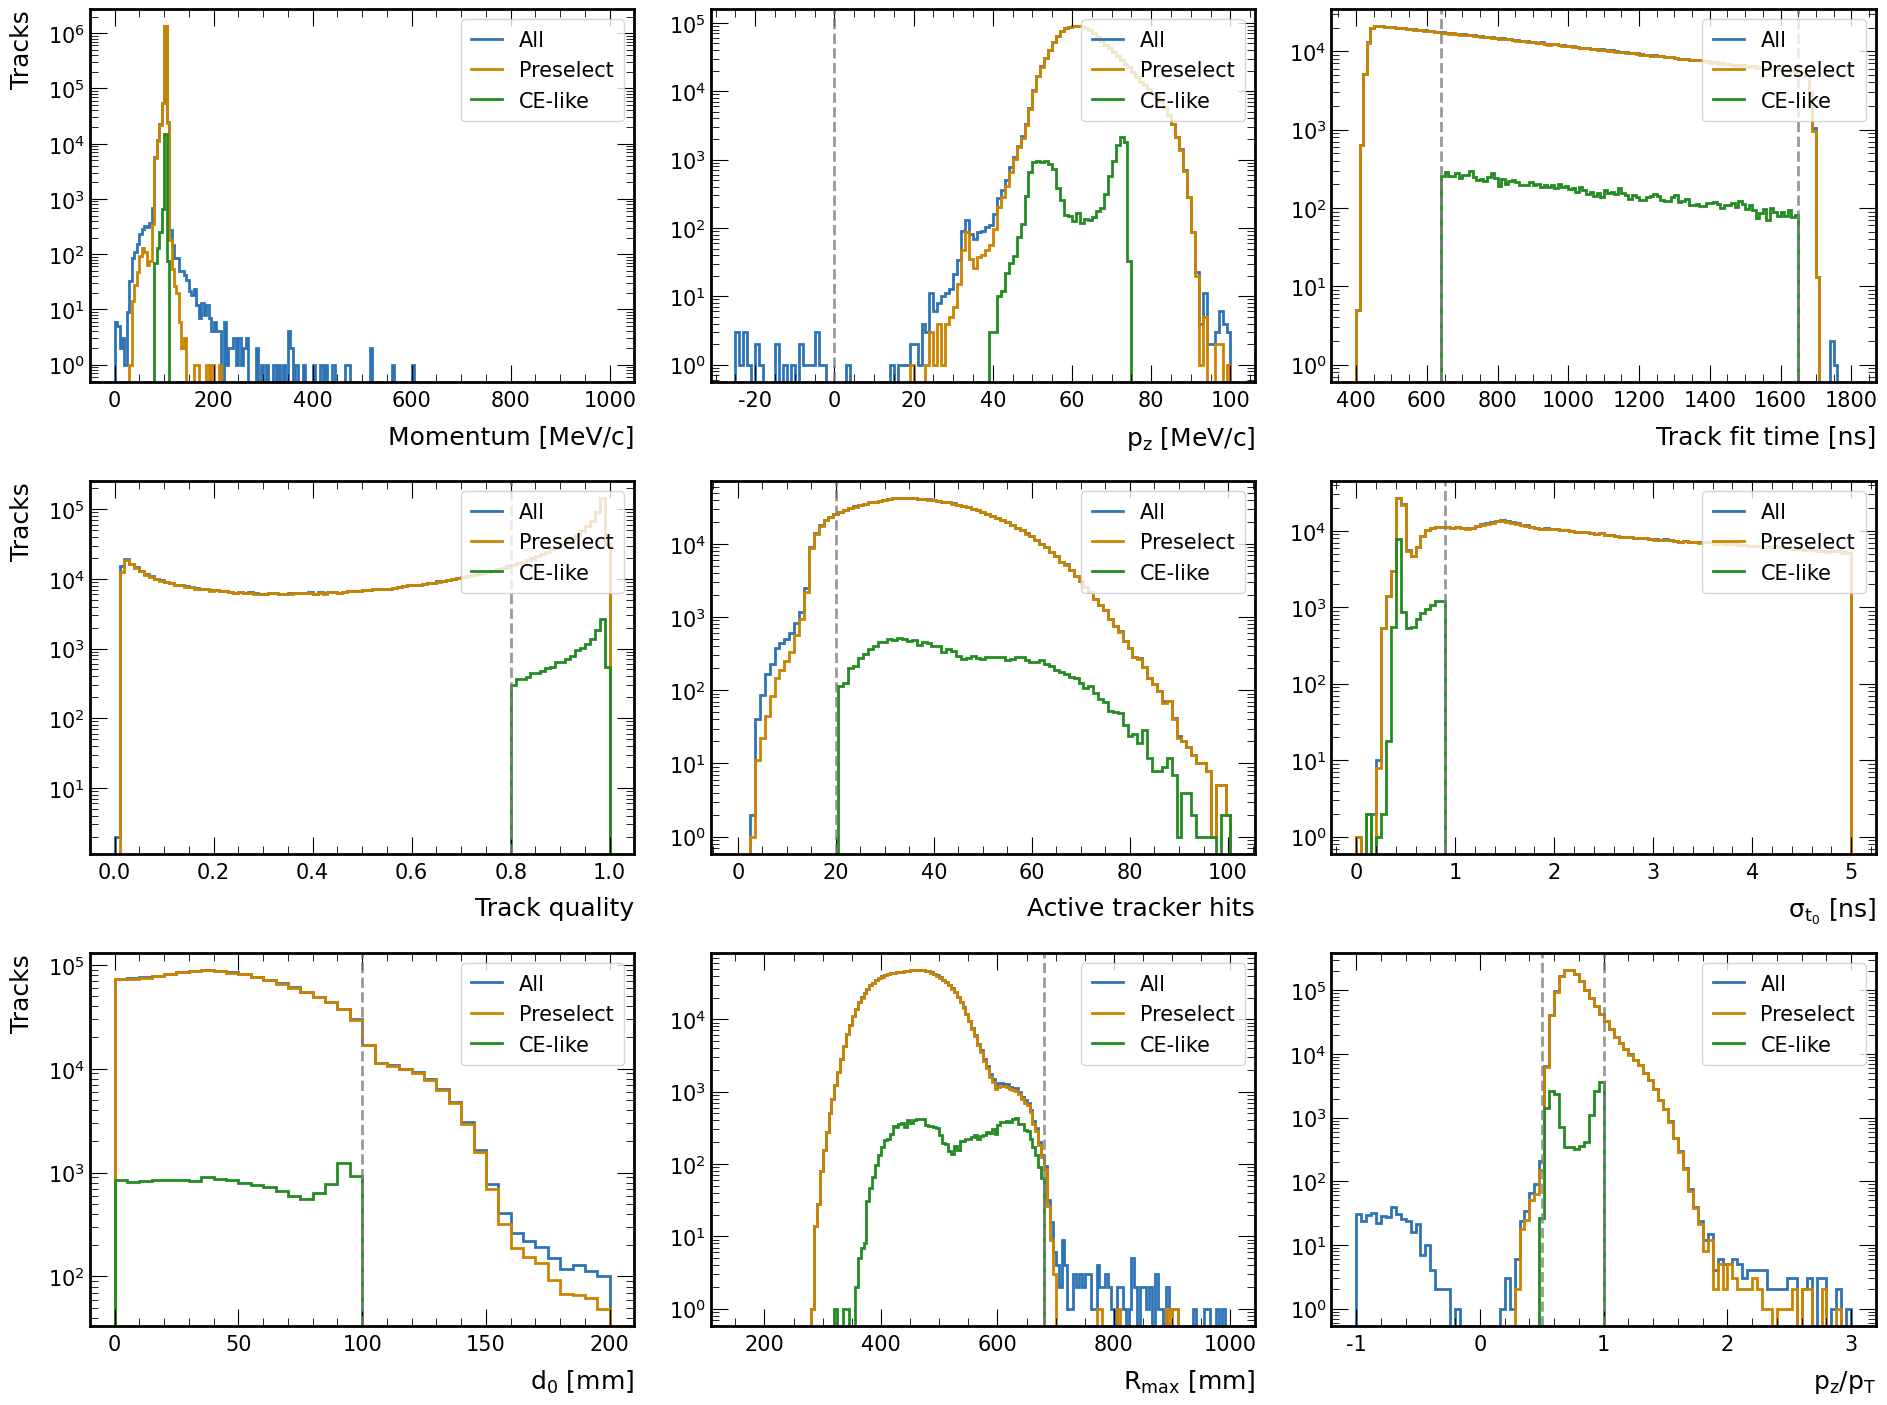

In [10]:
draw.plot_summary(results["hists"], out_path=f"{img_dir}/h1o_3x3_summary.png")

[Plot] ✅ 	Wrote ../../../output/images/SU2020a_signal_onspill-LH_aw/h1o_crv_z.png


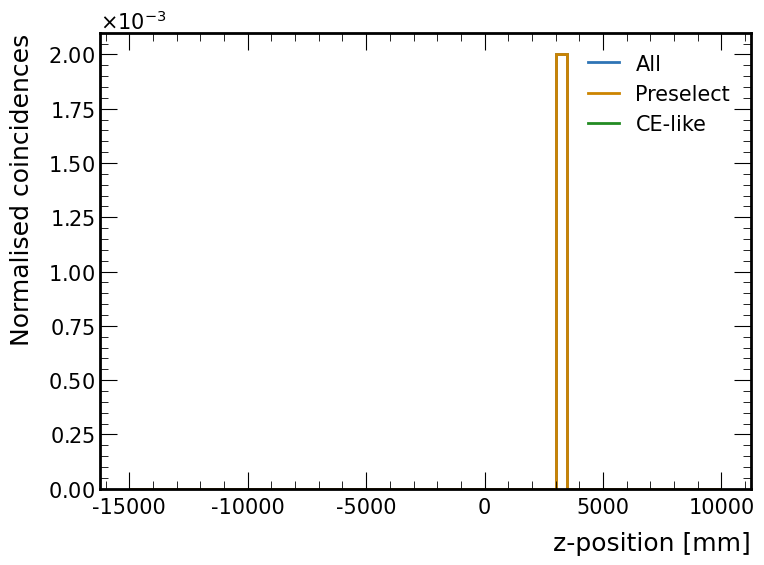

In [11]:
draw.plot_crv_z(results["hists"], out_path=f"{img_dir}/h1o_crv_z.png") 

### Background event info

In [12]:
print(results["event_info"])

None


In [13]:
if results["events"] is not None:
    from pyutils.pyprint import Print
    printer = Print()
    printer.print_n_events(results["events"], n_events = len(results["events"]))